# Final Project Rakamin DS#25 - Team CARR-ELO

- Batch     : Data Science 25th
- Kelompok  : Kel.5
- Dataset   : Car Auction Prices 
https://www.kaggle.com/datasets/tunguz/used-car-auction-prices 

In [ ]:
!python --version

Python 3.7.14


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Industri mobil bekas merupakan suatu industri yang menarik untuk diamati pertumbuhannya disamping itu harga mobil terus berubah tergantung berbagai faktor. Di bawah ini adalah penjelasan atas fitur/kolom dari data mobil bekas yang paling penting untuk dipahami ketika akan membeli mobil bekas di lelang:

- `Year` : Tahun produksi mobil
- `Make` : Merk/pabrikan mobil
- `Model` : Model/jenis mobil dari brand tertentu. cth: avanza, innova, mobilio, dll
- `Trim` : Jenis mobil berbeda dari model brand tertentu
- `Body` : Tipe/Jenis dari mobil cth: sedan, suv, dll
- `Transmission` : Jenis transmisi dari mobil yaitu manual dan automatic
- `VIN` : Vehicle identification number/Plat Nomor Mobil
- `State` : Daerah dimana mobil dilelang
- `Condition` : Kondisi mobil saat dilakukan lelang mulai dari 1 - 5
- `Odometer` : Jarak tempuh dari mobil sejak keluar pabrik
- `Color` : Warna exterior mobil
- `Interior` : Warna interior mobil
- `Seller` : Penjual mobil/dealer
- `mmr` : Manhiem market record/harga estimasi market price
- `sellingprice` : Harga mobil yang terjual pada saat lelang
- `saledate` : tanggal mobil terjual di lelang

In [ ]:
# Cara 1 - Local File (harus upload)
df = pd.read_csv('car_prices.csv',error_bad_lines=False,warn_bad_lines=True)
df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,"kia motors america, inc",20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,"kia motors america, inc",20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,4.5,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,4.1,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,4.3,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


In [ ]:
# Cara 2 - Online using G-Sheet

df = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vQNj58Nife2nRMtJFhszCWj7Paw2zoegJgmOy1uXTTnJoXng01h_wHqHesh3qqWCd7Lfh3FYGosD3VO/pub?gid=897099369&single=true&output=csv',error_bad_lines=False,warn_bad_lines=True)
df

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,"kia motors america, inc","20.500,00","21.500,00",Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,"kia motors america, inc","20.800,00","21.500,00",Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,44685.0,1331.0,gray,black,financial services remarketing (lease),"31.900,00","30.000,00",Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,44565.0,14282.0,white,black,volvo na rep/world omni,"27.500,00","27.750,00",Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,44624.0,2641.0,gray,black,financial services remarketing (lease),"66.000,00","67.000,00",Thu Dec 18 2014 12:30:00 GMT-0800 (PST)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558832,2015,Kia,K900,Luxury,Sedan,NaN,knalw4d4xf6019304,in,44685,18255.0,silver,black,avis corporation,"35.300,00","33.000,00",Thu Jul 09 2015 07:00:00 GMT-0700 (PDT)
558833,2012,Ram,2500,Power Wagon,Crew Cab,automatic,3c6td5et6cg112407,wa,5,54393.0,white,black,i -5 uhlmann rv,"30.200,00","30.800,00",Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)
558834,2012,BMW,X5,xDrive35d,SUV,automatic,5uxzw0c58cl668465,ca,44777,50561.0,black,black,financial services remarketing (lease),"29.800,00","34.000,00",Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)
558835,2015,Nissan,Altima,2.5 S,sedan,automatic,1n4al3ap0fc216050,ga,44776,16658.0,white,black,enterprise vehicle exchange / tra / rental / t...,"15.100,00","11.100,00",Thu Jul 09 2015 06:45:00 GMT-0700 (PDT)


# **Stage 1 : EDA, Insights, & Visualization**

## Part 1.1 - Descriptive Statistics

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 361279 entries, 0 to 361278
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          361279 non-null  int64  
 1   make          355137 non-null  object 
 2   model         355072 non-null  object 
 3   trim          354807 non-null  object 
 4   body          352263 non-null  object 
 5   transmission  321691 non-null  object 
 6   vin           361278 non-null  object 
 7   state         361278 non-null  object 
 8   condition     349485 non-null  float64
 9   odometer      361193 non-null  float64
 10  color         360760 non-null  object 
 11  interior      360760 non-null  object 
 12  seller        361278 non-null  object 
 13  mmr           361278 non-null  float64
 14  sellingprice  361278 non-null  float64
 15  saledate      361278 non-null  object 
dtypes: float64(4), int64(1), object(11)
memory usage: 44.1+ MB


In [ ]:
df.isnull().sum().sort_values(ascending = False)

transmission    65353
body            13195
condition       11794
trim            10651
model           10399
make            10301
color             749
interior          749
odometer           94
vin                 4
year                0
state               0
seller              0
mmr                 0
sellingprice        0
saledate            0
dtype: int64

Terdapat kolom yang memiliki missing value, antara lain:
 - make
 - model
 - trim
 - body
 - transmission 
 - vin
 - condition
 - odometer
 - color
 - interior

kolom yang memiliki missing value terbanyak ada di kolom transmisson

In [ ]:
df.duplicated().any()

False

Tidak ada data yang duplikat di dalam dataset

In [ ]:
#  kategorisasi
nums = ['year', 'condition', 'odometer', 'mmr', 'sellingprice']
cats = ['make','model', 'body', 'transmission', 'trim', 'vin', 'state','color', 'interior', 'seller', 'saledate']

### Fitur Deskriptif

In [ ]:
df[nums].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558837 entries, 0 to 558836
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558837 non-null  int64  
 1   condition     547043 non-null  object 
 2   odometer      558743 non-null  float64
 3   mmr           558837 non-null  object 
 4   sellingprice  558837 non-null  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 21.3+ MB


In [ ]:
df[nums].describe()

,year,odometer
count,558837.000000,558743.000000
mean,2010.038927,68320.016670
std,3.966864,53398.544224
min,1982.000000,1.000000
25%,2007.000000,28371.000000
50%,2012.000000,52254.000000
75%,2013.000000,99109.000000
max,2015.000000,999999.000000


In [ ]:
df[cats].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558837 entries, 0 to 558836
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   make          548536 non-null  object
 1   model         548438 non-null  object
 2   body          545642 non-null  object
 3   transmission  493484 non-null  object
 4   trim          548186 non-null  object
 5   vin           558833 non-null  object
 6   state         558837 non-null  object
 7   color         558088 non-null  object
 8   interior      558088 non-null  object
 9   seller        558837 non-null  object
 10  saledate      558837 non-null  object
dtypes: object(11)
memory usage: 46.9+ MB


In [ ]:
df[cats].describe()

,make,model,body,transmission,trim,vin,state,color,interior,seller,saledate
count,548536,548438,545642,493484,548186,558833,558837,558088,558088,558837,558837
unique,96,973,87,4,1966,550297,64,46,17,14266,3766
top,Ford,Altima,Sedan,automatic,Base,automatic,fl,black,black,nissan-infiniti lt,Tue Feb 10 2015 01:30:00 GMT-0800 (PST)
freq,93554,19349,199437,475914,55817,22,82945,110970,244329,19693,5334


Analisis Numericals:
- adanya anomali pada nilai minimum sellingprice 

Analisis Categoricals:
 - Kolom transmission didominasi oleh mobil dengan transmisi automatic (lebih dari 50%),
 - Kolom color dan interior didominasi oleh mobil dengan warna exterior dan interior black
 - Kolom make didominasi oleh mobil dengan merk Ford.

In [ ]:
for col in cats:
    print(f'''Value count kolom {col}:''')
    print(df[col].value_counts())
    print()

Value count kolom make:
Ford          93554
Chevrolet     60197
Nissan        53946
Toyota        39871
Dodge         30710
              ...  
airstream         1
ford tk           1
chev truck        1
hyundai tk        1
Lotus             1
Name: make, Length: 96, dtype: int64

Value count kolom model:
Altima        19349
F-150         14479
Fusion        12946
Camry         12545
Escape        11861
              ...  
rrs               1
golf              1
g500              1
tahoe             1
458 Italia        1
Name: model, Length: 973, dtype: int64

Value count kolom body:
Sedan          199437
SUV            119292
sedan           41906
suv             24552
Hatchback       21380
                ...  
cab plus 4          1
g37 coupe           1
CTS-V Wagon         1
Ram Van             1
cts wagon           1
Name: body, Length: 87, dtype: int64

Value count kolom transmission:
automatic    475914
manual        17544
sedan            15
Sedan            11
Name: transmissio

Pengamatan Descriptive Statistik:
- Data terdiri dari 558811 baris dan 16 kolom
- Tidak ada issue pada nama dan isi setiap kolom
- Tampak beberapa kolom masih memiliki null/missing values kolom make, mode, trim, body, transmission, vin, condition, odometer, color, interior)
- Missing values terbesar berada pada kolom transmission sejumlah 65353


## Part 1.2 - Univariate Analysis

### Boxplot

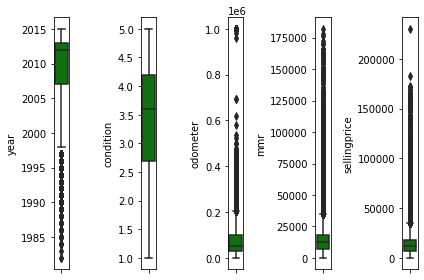

In [ ]:
for i in range(0, len(nums)):
    plt.subplot(1, len(nums), i+1)
    sns.boxplot(y=df[nums[i]], color='green', orient='v')
    plt.tight_layout()

Definisikan outlier menggunakan Quantile (IQR)

In [ ]:
def detect_outliers(df, x):
    Q1 = df[x].quantile(.25)
    Q3 = df[x].quantile(.75)
    IQR = Q3-Q1
    return df[(df[x] < Q1-1.5*IQR) | (df[x] > Q3+1.5*IQR)]

#### Detect Outlier Features

In [ ]:
out_cond = detect_outliers(df, 'condition').shape[0] 
print('Jumlah outlier column condition :', out_cond)

Jumlah outlier column condition : 0


In [ ]:
out_odo = detect_outliers(df, 'odometer').shape[0]
print('Jumlah outlier column odometer :', out_odo)

Jumlah outlier column odometer : 10375


In [ ]:
out_mmr = detect_outliers(df, 'mmr').shape[0]
print('Jumlah outlier column mmr :', out_mmr)

Jumlah outlier column mmr : 16315


Dari column feature dengan analisa IQR pada plot boxplot dan detect outlier, dilihat bahwa column condition tidak memiliki outlier. Untuk odometer memiliki outlier sebanyakk 10375 dan column mmr memiliki 16315 outlier. 

#### Detect Outlier Target

In [ ]:
out_sell = detect_outliers(df, 'sellingprice').shape[0]
print('Jumlah outlier column sellingprice :', out_sell)

Jumlah outlier column sellingprice : 16354


Dari column target dengan analisa IQR pada plot boxplot dan detect outlier, dilihat bahwa column sellingprice memiliki **16354 outlier**

### Analisa Boxplot Features dan Target

Dari gambar boxplot didapat bahwa column condition tidak memiliki outlier dan distribusinya cenderung negative skewed. Untuk column lain yaitu odometer,mmr dan sellingprice banyak outlier yang terletak di nilai yang lebih besar (positive skewed). Serta dari function detect outlier bisa melihat banyaknya outlier. Oleh karena itu pada data preprocessing dan cleaning, bisa dilakukan penghapusan outlier dengan metode quantile IQR maupun menggunakan log transformation untuk mengatasi positive skewed

### Distribution Plot

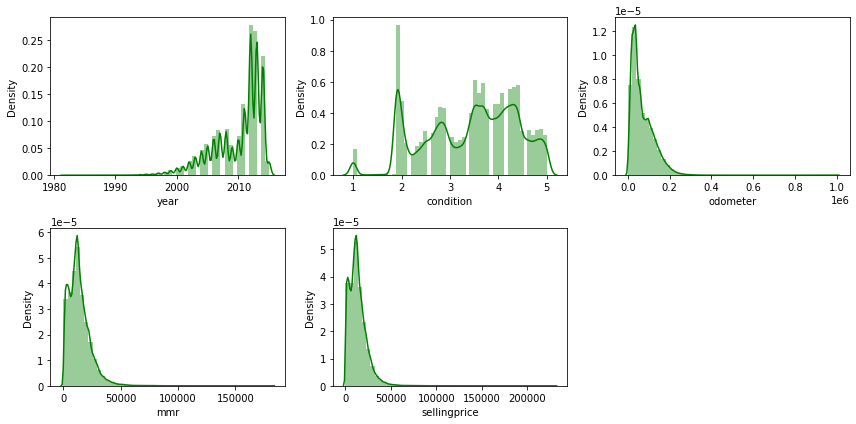

In [ ]:
plt.figure(figsize=(12, 6))
for i in range(0, len(nums)):
    plt.subplot(2, 3, i+1)
    sns.distplot(df[nums[i]], color='green')
    plt.tight_layout()

### Analisa Distribution Plot

- Dari distribution plot terlihat untuk feature odometer, selling price, serta mmr memiliki distribusi yang positif (positively skewed) dimana nilai outlier cukup jauh ke kanan atau berada di nilai yang besar. sedangkan umumnya data fitur tersebar nilai yang cukup rendah.

- Target memiliki kemiringan yang positif dimana nilai outliernya pun berada pada nilai yang besar

- fitur condition perlu diperhatikan dikarenakan memiliki skala ordinal pada distribution plot

- fitur tahun memiliki distribusi kemiringan negatif, yang dimana data/transaksi terjadi cukup benyak >2010



### Countplot

ValueError: ignored

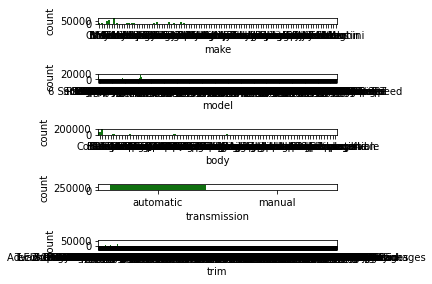

In [ ]:
for i in range(0, len(cats)):
    plt.subplot(5,1, i+1)
    sns.countplot(df[cats[i]], color='green', orient='h')
    plt.tight_layout()

### Analisa Countplot Features 

Dari countplot dapat terlihat,pada beberapa feature seperti 'make', 'model', 'trim', 'body', 'color', 'interior'  'vin', 'state', terlihat sangat banyak sekali kategori, ada kategori yang mendominasi dan ada yang jumlahnya sangat jauh lebih sedikit. Kategori yang terlalu banyak dapat menurunkan performance komputasi machine learning. Kategori yang jumlah nya sangat lebih sedikit ini dapat dimasukkan ke kategori baru yaitu 'other' misalnya.

## Check Duplicate

In [ ]:
#check duplicate
df.duplicated().sum()

0

## Missing Value

In [ ]:
df.isna().sum().sort_values(ascending=False)

transmission    65353
body            13195
condition       11794
trim            10651
model           10399
make            10301
color             749
interior          749
odometer           94
year                0
vin                 0
state               0
seller              0
mmr                 0
sellingprice        0
saledate            0
dtype: int64

# Part 1.3 - Multivariate Analysis

In [ ]:
corr=df.corr()
corr

,year,condition,odometer,mmr,sellingprice
year,1.000000,0.551282,-0.772720,0.596623,0.586488
condition,0.551282,1.000000,-0.538874,0.485050,0.538788
odometer,-0.772720,-0.538874,1.000000,-0.588107,-0.582405
mmr,0.596623,0.485050,-0.588107,1.000000,0.983634
sellingprice,0.586488,0.538788,-0.582405,0.983634,1.000000


### Correlation Heatmap

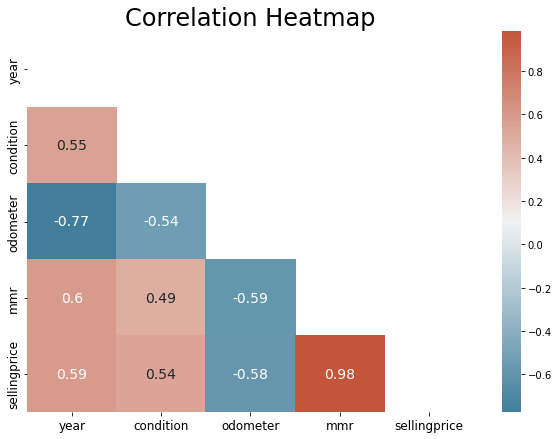

In [ ]:
# Correlation Heatmap 
mask = np.triu(np.ones_like(corr, dtype=bool))# Generate a mask for upper traingle
plt.figure(figsize=(10,7))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(df.corr(), mask=mask, annot=True, cmap=cmap,annot_kws={'size':14})
plt.title("Correlation Heatmap", fontsize =24)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

Dari Correlation Heatmap diatas diperoleh beberapa informasi berikut :

*   Target sellingprice dan feature mmr memiliki korelasi positif yang sangat kuat.
*   Target juga memiliki korelasi yang cukup kuat dengan beberapa feature independent lainnya (year, condition, odometer)
*   Feature odometer dan year memiliki korelasi negatif yang sangat kuat. Secara umum nilai koefisien korelasi pearson yang lebih besar dari 0,7 menunjukkan adanya multi-collinearity (ada kemungkinan kedua features tersebut redundan dan saling mempengaruhi secara terbalik terhadap variabel lain).

### Pair Plots

<Figure size 720x720 with 0 Axes>

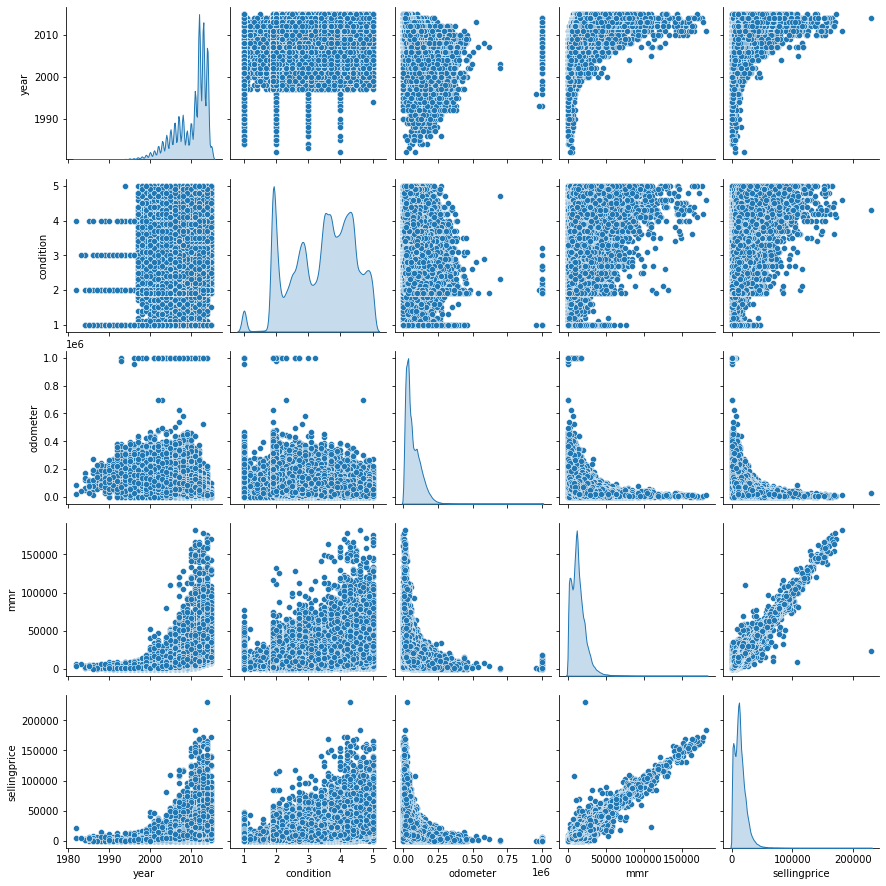

In [ ]:
plt.figure(figsize=(10,10))
sns.pairplot(df, diag_kind='kde')

Dari pair plot diatas terlihat bahwa :
- Semakin tinggi tahun (mobil keluaran baru) maka harga semakin mahal, sebaliknya semakin rendah tahun (mobil keluaran lama) maka harga semakin murah.
- Semakin tinggi condition maka harga akan semakin mahal, sebaliknya semakin rendah condition maka harga akan semakin murah.
- Semakin tinggi odometer maka harga akan semakin rendah, sebaliknya jika odometer rendah maka sellingprice akan tinggi.
- Target sellingprice memiliki korelasi positif linear dengan feature mmr. Semakin tinggi nilai mmr maka akan semakin tinggi nilai sellingprice.

# Part 1.4 - Business Insight

### Top 10 Mobil yang laku terjual berdasarkan brand

In [ ]:
df['make'].value_counts().iloc[:10]

Ford         93554
Chevrolet    60197
Nissan       53946
Toyota       39871
Dodge        30710
Honda        27206
Hyundai      21816
BMW          20719
Kia          18077
Chrysler     17276
Name: make, dtype: int64

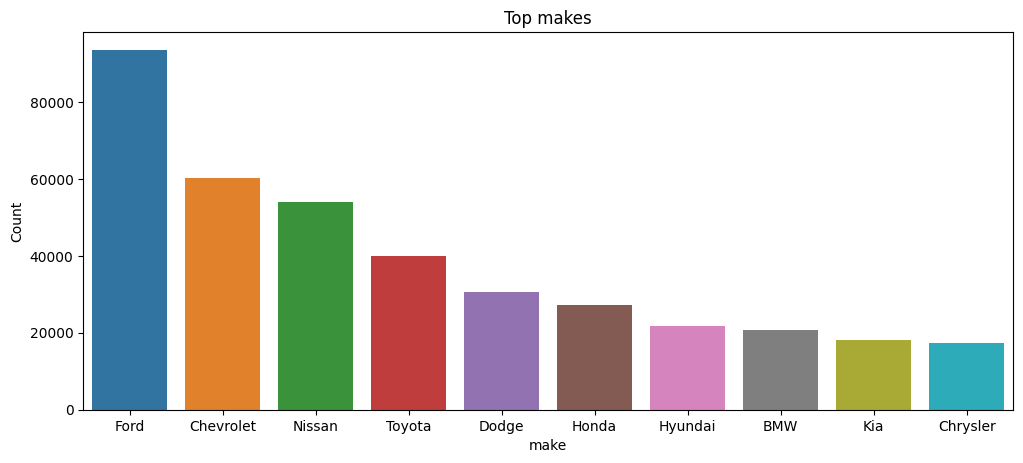

In [ ]:
plt.figure(figsize = (12,5), dpi=100)
sns.countplot(df['make'], order=df['make'].value_counts().index[:10])
plt.title('Top makes')
plt.ylabel("Count")
plt.show()

### Top 10 model yang laku terjual

In [ ]:
df['model'].value_counts().iloc[:10]

Altima           19349
F-150            14479
Fusion           12946
Camry            12545
Escape           11861
Focus            10394
Accord            9127
3 Series          8204
Grand Caravan     7941
Impala            7923
Name: model, dtype: int64

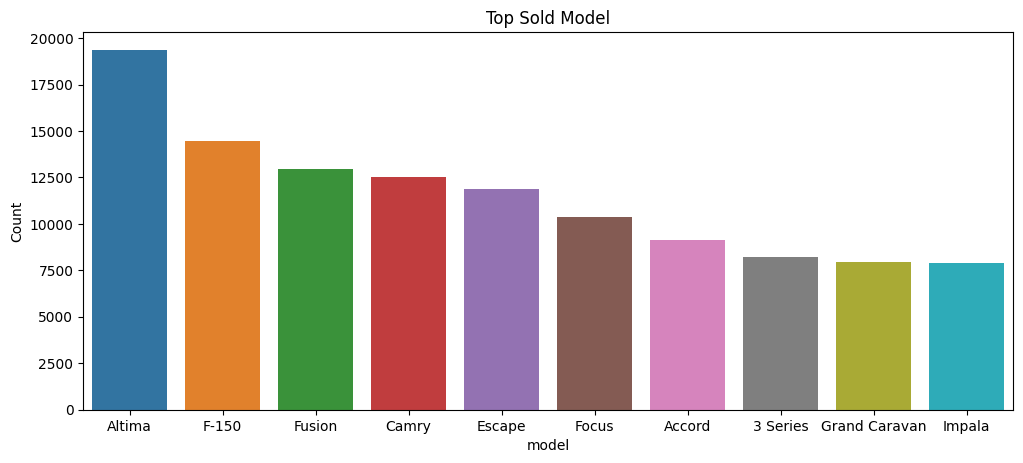

In [ ]:
plt.figure(figsize = (12,5), dpi=100)
sns.countplot(df['model'], order=df['model'].value_counts().index[:10])
plt.title('Top Sold Model')
plt.ylabel("Count")
plt.show()

### Top 10 Tipe/jenis mobil yang laku terjual

In [ ]:
df['body'].value_counts().iloc[:10]

Sedan          199437
SUV            119292
sedan           41906
suv             24552
Hatchback       21380
Minivan         21363
Coupe           14602
Wagon           13630
Crew Cab        13280
Convertible      8652
Name: body, dtype: int64

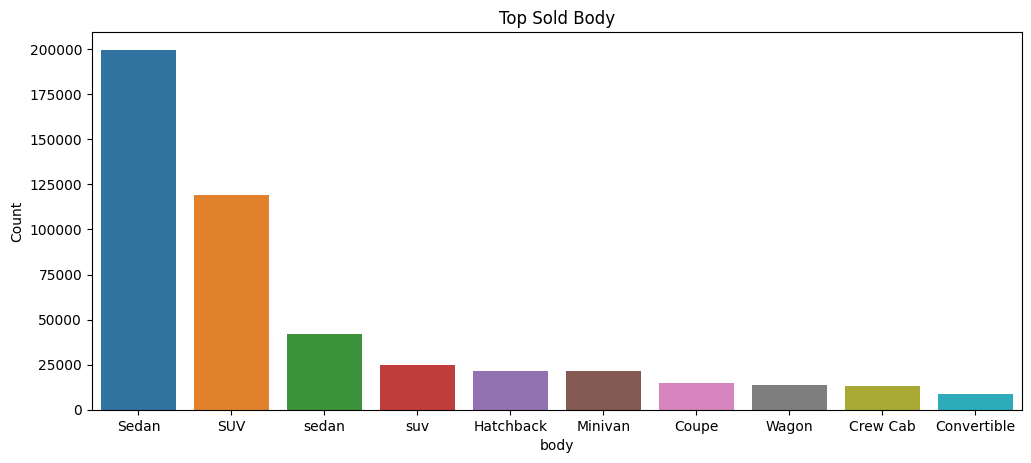

In [ ]:
plt.figure(figsize = (12,5), dpi=100)
sns.countplot(df['body'], order=df['body'].value_counts().index[:10])
plt.title('Top Sold Body')
plt.ylabel("Count")
plt.show()

### Top 10 state/wilayah dengan pembelian mobil terbanyak

In [ ]:
df['state'].value_counts().iloc[:10]

fl    82945
ca    73148
pa    53907
tx    45913
ga    34750
nj    27784
il    23486
nc    21845
oh    21575
tn    20895
Name: state, dtype: int64

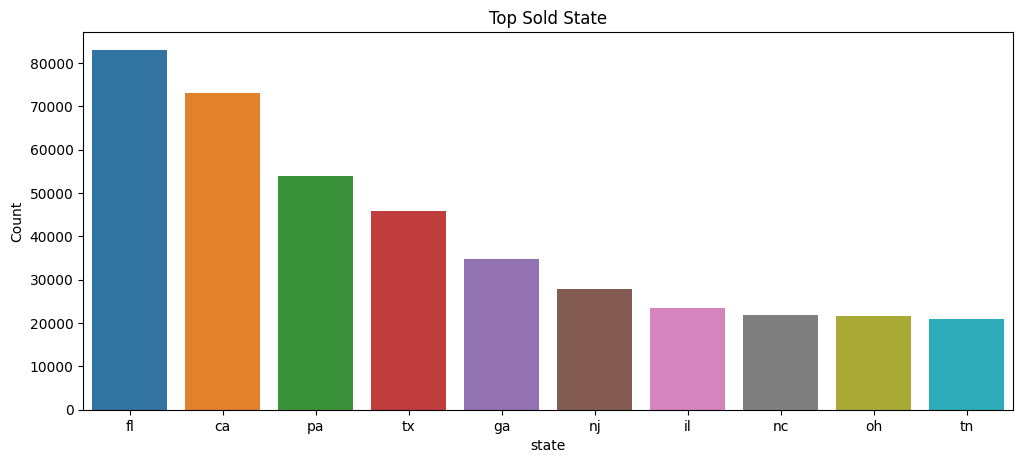

In [ ]:
plt.figure(figsize = (12,5), dpi=100)
sns.countplot(df['state'], order=df['state'].value_counts().index[:10])
plt.title('Top Sold State')
plt.ylabel("Count")
plt.show()

### Transmisi yang lebih laku terjual

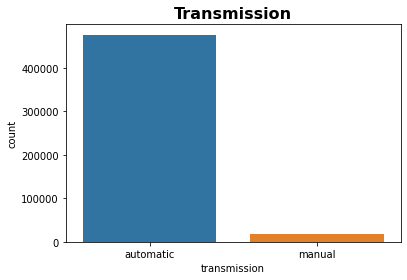

In [ ]:
sns.countplot(x = 'transmission', data = df)
plt.title('Transmission', fontsize = 16, fontweight='bold');

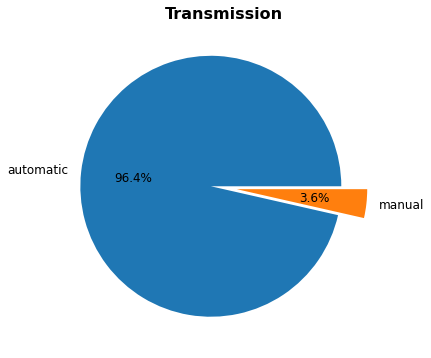

In [ ]:
df['transmission'].value_counts().plot.pie(explode=[0.1, 0.1], autopct='%.1f%%', figsize=(6,6),fontsize=12)
plt.title('Transmission',fontsize=16, fontweight='bold')
plt.ylabel(None)
plt.show()

### Sebaran unit yang laku terjual sesuai kondisi

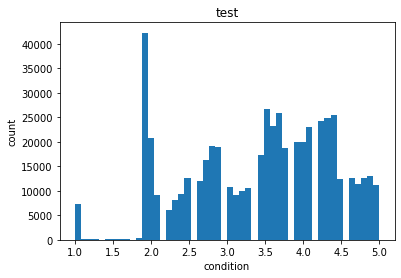

In [ ]:
plt.hist(df['condition'],bins=50)
plt.title('test')
plt.xlabel('condition')
plt.ylabel('count')
plt.show()

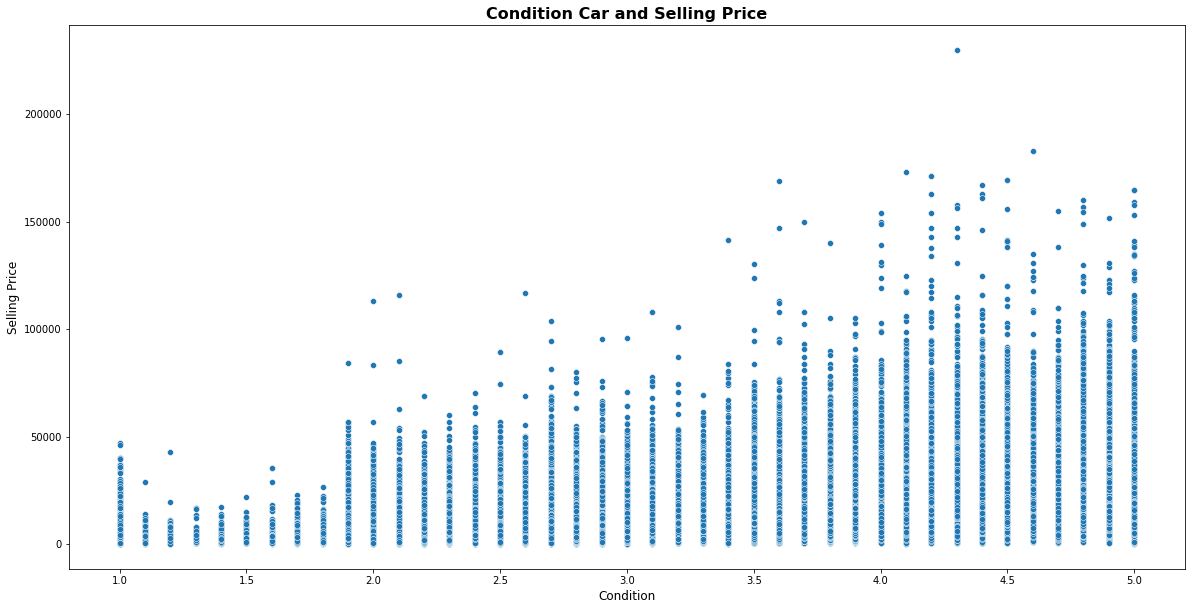

In [ ]:
plt.figure(figsize=(20,10))
sns.scatterplot(x='condition',y='sellingprice',data=df)
plt.title('Condition Car and Selling Price',fontsize=16, fontweight='bold')
plt.xlabel('Condition',fontsize=12)
plt.ylabel('Selling Price', fontsize=12)

plt.show()

### Summary Business Insight

Berdasarkan dataset yang kami analisa, kami dapati kondisi sebagai berikut:


*   Brand Ford, Chevrolet & nissan merupakan brand yang laku terjual dan banyak diminati di amerika.
Dealer dapat menyusun komposisi stok unit sesuai unit yang diminati masyarakat.

*   Preferensi tipe mobil berdasarkan mobil yang terjual adalah tipe sedan dan SUV.
Dealer dapat mempriotitaskan untuk membeli varian sedan & suv karena banyak diminati.

*   Unit yang laku terjual dan banyak diminati adalah unit dengan transmisi automatic.
Dealer dapat membeli unit stok dengan proporsi terbanyak adalah transmisi automatic.

*  Semakin baik kondisi mobil (rating diatas 3) maka harga belinya juga semakin tinggi sementara unit dengan kondisi buruk (rating dibawah 3) banyak diminati karna harga lebih murah.
Dealer dapat membeli unit dengan kualitas kondisi dibawah 3 untuk kemudian diperbaiki sebelum dijual dengan harga yang lebih baik agar mendapatkan keuntungan yang lebih baik.



# **Stage 2 : Data Preprocessing**

## Part 2.1 - Data Cleansing

In [ ]:
# check all columns
df.columns

Index(['year', 'make', 'model', 'trim', 'body', 'transmission', 'vin', 'state',
       'condition', 'odometer', 'color', 'interior', 'seller', 'mmr',
       'sellingprice', 'saledate'],
      dtype='object')

### Drop Columns

Beberapa kolom yang dihapus antara lain :
- vin
- state
- interior
- seller
- mmr
- saledate

### **vin**

In [ ]:
df['vin'].unique()

In [ ]:
df.drop(columns = 'vin', inplace = True, axis = 1)

VIN (Vehicle Identification Number) merupakan plat nomor mobil bersifat unik yang dimiliki oleh tiap unit mobil. Alasan menghapus feature vin adalah karena feature ini tidak memiliki pengaruh terhadap target sellingprice karena bukan sebagai aspek penting yang dipertimbangkan dalam penentuan harga kendaraan

### **interior**

Perbandingan kolom color dan interior

In [ ]:
df['color'].unique()

array(['white', 'gray', 'black', 'red', 'silver', 'brown', 'beige',
       'blue', 'purple', 'burgundy', '—', 'gold', 'yellow', 'green',
       'charcoal', 'orange', 'off-white', 'turquoise', 'pink', 'lime'],
      dtype=object)

In [ ]:
df['interior'].unique()

array(['black', 'beige', 'tan', 'brown', '—', 'gray', 'burgundy', 'white',
       'silver', 'off-white', 'red', 'yellow', 'green', 'purple', 'blue',
       'orange', 'gold'], dtype=object)

In [ ]:
df.drop(columns = 'interior', inplace = True, axis = 1)

Feature interior memiliki nilai yang sama dengan feature color. Alasan menghapus feature interior dan memilih mempertahankan feature color adalah karena lebih mudah mengidentifikasi mobil berdasarkan warna exterior.  

### **seller**

Perbandingan kolom make dan seller

In [ ]:
df['make'].unique()

array(['Kia', 'BMW', 'Volvo', 'Nissan', 'Chevrolet', 'Audi', 'Ford',
       'Cadillac', 'Acura', 'Lexus', 'Hyundai', 'Buick', 'Infiniti',
       'Jeep', 'Mercedes-Benz', 'Mitsubishi', 'Mazda', 'MINI',
       'Land Rover', 'Lincoln', 'Jaguar', 'Volkswagen', 'Toyota',
       'Subaru', 'Scion', 'Porsche', 'Dodge', 'FIAT', 'Chrysler',
       'Ferrari', 'Honda', 'GMC', 'Ram', 'smart', 'Bentley', 'Pontiac',
       'Saturn', 'Maserati', 'Mercury', 'HUMMER', 'Saab', 'Suzuki',
       'Oldsmobile', 'Rolls-Royce', 'Isuzu', 'Plymouth', 'Tesla',
       'Aston Martin', 'Geo', 'Fisker', 'Daewoo', 'Lamborghini', 'Lotus'],
      dtype=object)

In [ ]:
df['make'].nunique()

53

In [ ]:
df['seller'].unique()

array(['kia motors america, inc',
       'financial services remarketing (lease)',
       'volvo na rep/world omni', ..., 'maserati north america inc',
       'alternative financial group inc', 'i -5 uhlmann rv'], dtype=object)

In [ ]:
df['seller'].nunique()

11456

In [ ]:
df.drop(columns = 'seller', inplace = True, axis = 1)

Alasan menghapus feature seller adalah karena feature ini memiliki unique value yang sangat banyak, sehingga dapat menyulitkan dalam proses feature encoding dan juga karena memiliki kemiripan dan bisa diwakili oleh kolom make.

### **mmr**

In [ ]:
# check correlation between target and mmr
df['sellingprice'].corr(df['mmr'])

0.9831965908240833

In [ ]:
df.drop(columns = 'mmr', inplace = True, axis = 1)

Korelasi antara target sellingprice dan feature mmr memiliki nilai positif yang sangat kuat (0.98), sehingga feature mmr dihapus untuk menghindari redundan antar kedua feature. Permasalahan lain adalah distribusi dari mmr yang skewed dan bisa sangat memengaruhi prediksi sellingprice saat dilakukan training. Oleh karena itu salah satu opsinya adalah didrop.

### **saledate**

In [ ]:
df['saledate'].nunique()

2402

In [ ]:
df.drop(columns = 'saledate', inplace = True, axis = 1)

Nilai dari saledate berkisar dari 2014 hingga 2015 sehingga kurang banyak digali insightnya, dan waktu terjual sangat banyak faktor yang memengaruhinya seperti waktu ketersediaan pasokan, dll. yang membuatnya kurang relevan faktor saledate bisa didrop.

### **state**

In [ ]:
df['state'].nunique()

37

In [ ]:
df['state'] = df['state'].str.lower()
df['state'].nunique()

37

In [ ]:
df.drop(columns = 'state', inplace = True, axis = 1)

Alasan state dihapus karena memiliki cukup banyak state dan menyusahkan saat encoding, dan juga persebaran dari tiap state yang berdistribusi normal terhadap sellingprice sehingga bisa didrop

In [ ]:
# check all columns after drop columns
df.columns

Index(['year', 'make', 'model', 'trim', 'body', 'transmission', 'state',
       'condition', 'odometer', 'color', 'sellingprice'],
      dtype='object')

In [ ]:
#  kategorisasi
nums_update = ['year', 'condition', 'odometer', 'sellingprice']
cats_update = ['make','model', 'trim', 'body','transmission','color']

### Handle Unique Values

### **make**

In [ ]:
df['make'].nunique()

96

In [ ]:
df['make'] = df['make'].str.lower()
df['make'].nunique()

66

In [ ]:
df['make'].unique()

array(['kia', 'bmw', 'volvo', 'nissan', 'chevrolet', 'audi', 'ford',
       'hyundai', 'buick', 'cadillac', 'acura', 'lexus', 'infiniti',
       'jeep', 'mercedes-benz', 'mitsubishi', 'mazda', 'mini',
       'land rover', 'lincoln', 'jaguar', 'volkswagen', 'toyota',
       'subaru', 'scion', 'porsche', nan, 'dodge', 'fiat', 'chrysler',
       'ferrari', 'honda', 'gmc', 'ram', 'smart', 'bentley', 'pontiac',
       'saturn', 'maserati', 'mercury', 'hummer', 'landrover', 'mercedes',
       'gmc truck', 'saab', 'suzuki', 'oldsmobile', 'isuzu', 'dodge tk',
       'geo', 'rolls-royce', 'mazda tk', 'hyundai tk', 'mercedes-b', 'vw',
       'daewoo', 'chev truck', 'ford tk', 'plymouth', 'ford truck',
       'tesla', 'airstream', 'dot', 'aston martin', 'fisker',
       'lamborghini', 'sat'], dtype=object)

In [ ]:
df=df.replace({'make':
        {'mercedes' : 'mercedes-benz', 'gmc truck': 'gmc','dodge tk':'dodge','mazda tk': 'mazda','hyundai tk':'hyundai',
         'mercedes-b' : 'mercedes-benz','vw' : 'volkswagen','chev truck' : 'chevrolet', 'ford tk' : 'ford', 'ford truck' : 'ford'
        }})
df['make'].nunique()

56

Terdapat perbedaan jumlah uniqe data sebelum dan sesudah handling feature **make**.

### **model**

In [ ]:
df['model'].nunique()

943

In [ ]:
df['model'] = df['model'].str.lower()
df['model'].nunique()

822

Terdapat perbedaan jumlah uniqe data sebelum dan sesudah handling feature **model**.

### **trim**

In [ ]:
df['trim'].nunique()

1883

In [ ]:
df['trim'] = df['trim'].str.lower()
df['trim'].nunique()

1810

Terdapat perbedaan jumlah uniqe data sebelum dan sesudah handling feature **trim**.

### **body**

In [ ]:
df['body'].nunique()

46

In [ ]:
df['body'] = df['body'].str.lower()
df['body'].nunique()

43

Terdapat perbedaan jumlah uniqe data sebelum dan sesudah handling feature **body**.

### **transmission**

In [ ]:
df['transmission'].nunique()

2

In [ ]:
df['transmission'] = df['transmission'].str.lower()
df['transmission'].nunique()

2

feature **transmission** sudah memiliki data yang sesuai, sehingga tidak ada perubahan nilai unique value sebelum dan sesudah handling data.

### **color**

In [ ]:
df['color'].nunique()

20

In [ ]:
df['color'] = df['color'].str.lower()
df['color'].nunique()

20

In [ ]:
df['color'].unique()

array(['white', 'gray', 'black', 'red', 'silver', 'blue', 'brown',
       'beige', 'purple', 'burgundy', '—', 'gold', 'yellow', 'green',
       'charcoal', nan, 'orange', 'off-white', 'turquoise', 'pink',
       'lime'], dtype=object)

In [ ]:
df=df.replace({'color':
        {'—' : 'others', 'off-white' : 'white'}})
df['color'].nunique()

19

Terdapat perbedaan jumlah uniqe data sebelum dan sesudah handling feature **color**.

#### Summary Data Cleansing :
- Beberapa feature yang di drop/ dihapus dari dataset adalah feature vin, interior, seller, mmr, state, dan saledate.
- Penanganan unique value (mengubah karakter tiap data menjadi huruf kecil) dari beberapa feature kategorikal dibutuhkan untuk menyesuaikan nilai dari tiap feature.

## Part 2.2 - Handle Missing Values

In [ ]:
df.isna().sum().sort_values(ascending = False)

transmission    39588
condition       11794
body             9016
trim             6472
model            6207
make             6142
color             519
odometer           86
state               1
sellingprice        1
year                0
dtype: int64

In [ ]:
# impute transmission dengan modus
df['transmission'] = df['transmission'].fillna(df['transmission'].mode()[0])

#fill N/A menggunakan modus untuk data kategorikal transmisi

In [ ]:
# drop `body`, `model`, `trim`, `condition`, `color`, `odometer`, dan `make`
df = df.dropna()

#Melakukan drop atas data yang N/A untuk selain fitur transmisi karena data yang N/A tidak banyak
#selain itu jika dilakukan pengisian menggunakan modus dikhawatirkan data akan bias

1. transmission: impute dengan nilai modus (automatic),
2. body, trim, condition, color, odometer, make, dan model : drop (karena secara data yang N/A tidak banyak dan jikalau diisi menggunakan modus data dikhawatirkan akan bias),
3. year, saledate, dan sellingprice: tidak memiliki missing values sehingga tidak perlu dihandle.

In [ ]:
#ALTERNATIF

# impute body dengan modus
df['body'] = df['body'].fillna(df['body'].mode()[0])

# impute condition dengan median
df['condition'] = df['condition'].fillna(df['condition'].mode()[0])

# impute trim dengan modus
df['trim'] = df['trim'].fillna(df['trim'].mode()[0])

# impute model dengan modus
df['model'] = df['model'].fillna(df['model'].mode()[0])

# impute make dengan modus
df['make'] = df['make'].fillna(df['make'].mode()[0])


## Part 2.3 - Handle Duplicated Data

In [ ]:
df.duplicated().sum()

0

Tidak terdapat data duplicate didalam dataset, sehingga tidak diperlukan penanganan lebih lanjut.

## Part 2.4 - Handle Outliers

### Cara 1 : Menggunakan IQR

In [ ]:
df.duplicated().sum()

0

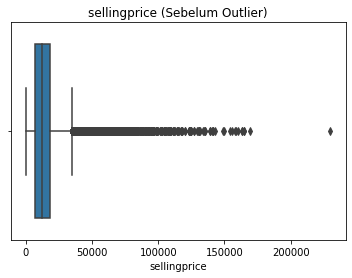

In [ ]:
sns.boxplot(x=df['sellingprice'])
plt.title('sellingprice (Sebelum Outlier)');

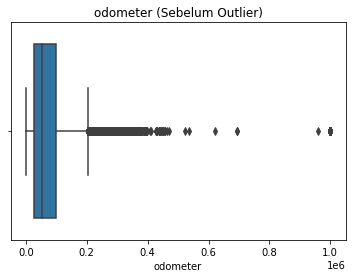

In [ ]:
sns.boxplot(x=df['odometer'])
plt.title('odometer (Sebelum Outlier)');

In [ ]:
# Fungsi IQR Untuk Handling Outlier
filtered_entries = np.array([True] * len(df))
for col in ['odometer', 'sellingprice']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    low_limit = Q1 - (IQR * 1.5)
    high_limit = Q3 + (IQR * 1.5)

    filtered_entries = ((df[col] >= low_limit) & (df[col] <= high_limit)) & filtered_entries
    
df = df[filtered_entries]

print(f'Jumlah baris sebelum filter outlier: {len(df)}')

print(f'Jumlah baris setelah filter outlier: {len(df)}')

Jumlah baris sebelum filter outlier: 324889
Jumlah baris setelah filter outlier: 324889


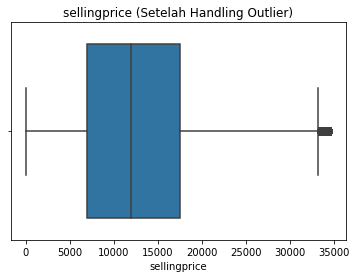

In [ ]:
sns.boxplot(x=df['sellingprice'])
plt.title('sellingprice (Setelah Handling Outlier)');

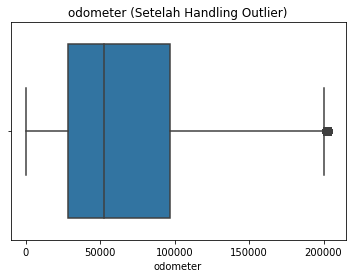

In [ ]:
sns.boxplot(x=df['odometer'])
plt.title('odometer (Setelah Handling Outlier)');

### Cara 2 : Menggunakan Z-Score

In [ ]:
import scipy.stats as stats

In [ ]:
print(f'Jumlah baris sebelum memfilter outlier: {len(df)}')

Jumlah baris sebelum memfilter outlier: 324889


In [ ]:
# Fungsi Looping 
print(f'Jumlah baris sebelum memfilter outlier: {len(df)}')

filtered_entries = np.array([True] * len(df))

for col in ['sellingprice', 'odometer']:
    zscore = abs(stats.zscore(df[col])) # hitung absolute z-scorenya
    filtered_entries = (zscore < 3) & filtered_entries # keep yang kurang dari 3 absolute z-scorenya
    
df_1_zscore = df[filtered_entries] # filter, cuma ambil yang z-scorenya dibawah 3

print(f'Jumlah baris setelah memfilter outlier: {len(df_1_zscore)}')

Jumlah baris sebelum memfilter outlier: 324889
Jumlah baris setelah memfilter outlier: 324889


In [ ]:
df.duplicated().sum()

0

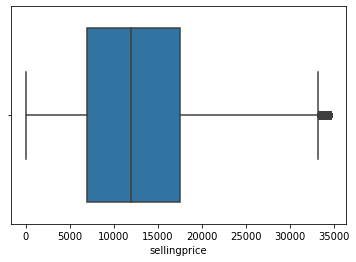

In [ ]:
sns.boxplot(x=df_1_zscore['sellingprice']);

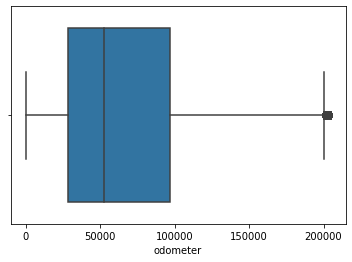

In [ ]:
sns.boxplot(x=df_1_zscore['odometer']);

## Part 2.5 - Feature Engineering

### Feature Selection

Feature yang dibuang : mmr, vin, interior, seller, saledate dan state

Feature yang digunakan : year, make, model, trim, body, transmission, condition, odometer, color dan sellingprice (sebagai target)

### Feature Extraction

#### Mapping top_10_make

In [ ]:
#Mengkerucutkan top 10 make
def top_10_make(x):
  if x['make'] == 'ford':
    top_10_make = 'ford'
  elif x['make'] == 'chevrolet':
    top_10_make = 'chevrolet'
  elif x['make'] == 'nissan':
    top_10_make = 'nissan'
  elif x['make'] == 'toyota':
    top_10_make = 'toyota'
  elif x['make'] == 'dodge':
    top_10_make = 'dodge'
  elif x['make'] == 'honda':
    top_10_make = 'honda'
  elif x['make'] == 'hyundai':
    top_10_make = 'hyundai'
  elif x['make'] == 'bmw':
    top_10_make = 'bmw'
  elif x['make'] == 'kia':
    top_10_make = 'kia'
  else:
    top_10_make = 'others'
  return top_10_make

df['top_10_make'] = df.apply(lambda x: top_10_make(x), axis=1)

#### Mapping top_10_body 

In [ ]:
df['body'].unique()

array(['suv', 'sedan', 'convertible', 'coupe', 'wagon', 'hatchback',
       'cab', 'van', 'others'], dtype=object)

In [ ]:
len(df['body'].unique())

41

In [ ]:
df['body'] = df['body'].str.lower()
len(df['body'].unique())

41

In [ ]:
body_list=[]

for index,kolom in df.iterrows():
  body=kolom['body']
  if body.endswith('cab')==True:
    bodies= 'cab'
  elif body.startswith('cab')==True:
    bodies= 'cab'
  elif body.endswith('coupe')==True:
    bodies= 'coupe'
  elif body.endswith('koup')==True:
    bodies= 'coupe'
  elif body.endswith('van')==True:
    bodies= 'van'
  elif body.endswith('wagon')==True:
    bodies= 'wagon'
  elif body.endswith('convertible')==True:
    bodies= 'convertible'
  elif body.endswith('suv')==True:
    bodies= 'suv'
  elif body.endswith('sedan')==True:
    bodies= 'sedan'
  elif body.endswith('hatchback')==True:
    bodies= 'hatchback'
  else:
    bodies='others'
  body_list.append(bodies)

df['body']=body_list

In [ ]:
df['body'].value_counts().iloc[:10]


sedan          151823
suv             83627
cab             21068
van             20039
hatchback       15774
coupe           11509
wagon           10171
convertible      5902
others           4976
Name: body, dtype: int64

###Mapping top_10_color

In [ ]:
def top_10_color(x):
  if x['color'] == 'black':
    top_10_color = 'black'
  elif x['color'] == 'white':
    top_10_color = 'white'
  elif x['color'] == 'gray':
    top_10_color = 'gray'
  elif x['color'] == 'silver':
    top_10_color = 'silver'
  elif x['color'] == 'blue':
    top_10_color = 'blue'
  elif x['color'] == 'red':
    top_10_color = 'red'
  elif x['color'] == 'gold':
    top_10_color = 'gold'
  elif x['color'] == 'green':
    top_10_color = 'green'
  elif x['color'] == 'burgundy':
    top_10_color = 'burgundy'
  else:
    top_10_color = 'others'
  return top_10_color

df['top_10_color'] = df.apply(lambda x: top_10_color(x), axis=1)

###Mapping top_10_model

In [ ]:
#Mengkerucutkan top 10 model
def top_10_model(x):
  if x['model'] == 'altima':
    top_10_model = 'altima'
  elif x['model'] == 'f-150':
    top_10_model = 'f-150'
  elif x['model'] == 'fusion':
    top_10_model = 'fusion'
  elif x['model'] == 'camry':
    top_10_model = 'camry'
  elif x['model'] == 'escape':
    top_10_model = 'escape'
  elif x['model'] == 'focus':
    top_10_model = 'focus'
  elif x['model'] == 'accord':
    top_10_model = 'accord'
  elif x['model'] == '3 series':
    top_10_model = '3 series'
  elif x['model'] == 'grand caravan':
    top_10_model = 'grand caravan'
  else:
    top_10_model = 'others'
  return top_10_model
  
df['top_10_model'] = df.apply(lambda x: top_10_model(x), axis=1)

###Mapping top_10_trim

In [ ]:
def top_10_trim(x):
  if x['trim'] == 'base':
    top_10_trim = 'base'
  elif x['trim'] == 'se':
    top_10_trim = 'se'
  elif x['trim'] == 'lx':
    top_10_trim = 'lx'
  elif x['trim'] == 'limited':
    top_10_trim = 'limited'
  elif x['trim'] == 'lt':
    top_10_trim = 'lt'
  elif x['trim'] == 'xlt':
    top_10_trim = 'xlt'
  elif x['trim'] == 'ls':
    top_10_trim = 'ls'
  elif x['trim'] == 'le':
    top_10_trim = 'le'
  elif x['trim'] == 'gls':
    top_10_trim = 'gls'
  else:
    top_10_trim = 'others'
  return top_10_trim

df['top_10_trim'] = df.apply(lambda x: top_10_trim(x), axis=1)

### Feature Transformation

In [ ]:
df.describe()

,year,condition,odometer,sellingprice
count,324889.000000,324889.000000,324889.000000,324889.000000
mean,2010.093115,3.417578,65663.913860,12802.559647
std,3.768632,0.945400,46772.268616,7581.530971
min,1990.000000,1.000000,1.000000,1.000000
25%,2008.000000,2.700000,28439.000000,7000.000000
50%,2012.000000,3.600000,52182.000000,12000.000000
75%,2013.000000,4.200000,97136.000000,17500.000000
max,2015.000000,5.000000,204547.000000,34600.000000


In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Normalisasi feature year dan odometer
df['year_norm'] = MinMaxScaler().fit_transform(df['year'].values.reshape(len(df), 1))
df['odometer_norm'] = MinMaxScaler().fit_transform(df['odometer'].values.reshape(len(df), 1))

# standarisasi feature sellingprice dan condition
df['sellingprice_std'] = StandardScaler().fit_transform(df['sellingprice'].values.reshape(len(df), 1))
df['condition_std'] = StandardScaler().fit_transform(df['condition'].values.reshape(len(df), 1))

In [ ]:
df.describe()

,year,condition,odometer,sellingprice,year_norm,odometer_norm,sellingprice_std,condition_std
count,324889.000000,324889.000000,324889.000000,324889.000000,324889.000000,324889.000000,3.248890e+05,3.248890e+05
mean,2010.093115,3.417578,65663.913860,12802.559647,0.803725,0.321018,-8.450693e-17,-2.524710e-16
std,3.768632,0.945400,46772.268616,7581.530971,0.150745,0.228664,1.000002e+00,1.000002e+00
min,1990.000000,1.000000,1.000000,1.000000,0.000000,0.000000,-1.688522e+00,-2.557205e+00
25%,2008.000000,2.700000,28439.000000,7000.000000,0.720000,0.139030,-7.653558e-01,-7.590218e-01
50%,2012.000000,3.600000,52182.000000,12000.000000,0.880000,0.255106,-1.058574e-01,1.929574e-01
75%,2013.000000,4.200000,97136.000000,17500.000000,0.920000,0.474881,6.195909e-01,8.276102e-01
max,2015.000000,5.000000,204547.000000,34600.000000,1.000000,1.000000,2.875075e+00,1.673814e+00


### Feature Encoding

In [ ]:
cats_update = ['top_10_make','top_10_model', 'top_10_trim', 'body','top_10_color','transmission']
cats_update

['top_10_make',
 'top_10_model',
 'top_10_trim',
 'body',
 'top_10_color',
 'transmission']

In [ ]:
##jangan di running dulu sebelum fixed/ fitur extraction untuk fitur2 kategorikal
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for x in cats_update:
    df[x] = le.fit_transform(df[x].astype(str))


In [ ]:
df.head()

,year,make,model,trim,body,transmission,state,condition,odometer,color,sellingprice,top_10_make,top_10_model,top_10_color,year_norm,odometer_norm,sellingprice_std,condition_std,top_10_trim
0,2015,kia,sorento,lx,6,0,ca,5.0,16639.0,white,21500.0,6,9,9,1.00,0.081341,1.147190,1.673814,6
1,2015,kia,sorento,lx,6,0,ca,5.0,9393.0,white,21500.0,6,9,9,1.00,0.045916,1.147190,1.673814,6
2,2014,bmw,3 series,328i sulev,5,0,ca,4.5,1331.0,gray,30000.0,0,0,4,0.96,0.006502,2.268337,1.144937,7
3,2015,volvo,s60,t5,5,0,ca,4.1,14282.0,white,27750.0,8,9,9,1.00,0.069818,1.971563,0.721835,7
5,2015,nissan,altima,2.5 s,5,0,ca,1.0,5554.0,gray,10900.0,7,2,4,1.00,0.027148,-0.250947,-2.557205,7
